# Setup
I just Visual Studio Code and Jupyter Notebook and run locally in my computer.

The libraries I use:
- numpy: 
- pandas: 
- 

NumPy for arrays, Pandas for data handling, Matplotlib/Seaborn for visualizations,
Scikit-learn for preprocessing, model, and metrics.

In [1102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Libraries loaded successfully")

Libraries loaded successfully


# Data Preparation
I use Iris dataset from D2L. This is a CSV file. 

Iris dataset is 150 samples....

In this step, I will load this CSV file and make sure the column names match expected features and target (species)

In [1103]:
# Load the Iris dataset from CSV
iris = pd.read_csv('dataset/Iris.csv')

# Display the first 5 rows of the dataset to make suare it's loaded correctly
print(iris.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# Data Exploration

## Display basic statistics
With SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm print min, max, mean, median and Standard deviation

With species -> print count

### SepalLengthCm statistics

In [1104]:
print("Min:", iris["SepalLengthCm"].min())
print("Max:", iris["SepalLengthCm"].max())
print("Mean:", iris["SepalLengthCm"].mean())
print("Median:", iris["SepalLengthCm"].median())
print("Standard Deviation:", iris["SepalLengthCm"].std())

Min: 4.3
Max: 7.9
Mean: 5.843333333333334
Median: 5.8
Standard Deviation: 0.828066127977863


### SepalWidthCm statistics

In [1105]:
print("Min:", iris["SepalWidthCm"].min())
print("Max:", iris["SepalWidthCm"].max())
print("Mean:", iris["SepalWidthCm"].mean())
print("Median:", iris["SepalWidthCm"].median())
print("Standard Deviation:", iris["SepalWidthCm"].std())

Min: 2.0
Max: 4.4
Mean: 3.0540000000000003
Median: 3.0
Standard Deviation: 0.4335943113621737


### PetalLengthCm statistics

In [1106]:
print("Min:", iris["PetalLengthCm"].min())
print("Max:", iris["PetalLengthCm"].max())
print("Mean:", iris["PetalLengthCm"].mean())
print("Median:", iris["PetalLengthCm"].median())
print("Standard Deviation:", iris["PetalLengthCm"].std())

Min: 1.0
Max: 6.9
Mean: 3.758666666666666
Median: 4.35
Standard Deviation: 1.7644204199522626


### PetalWidthCm statistics

In [1107]:
print("Min:", iris["PetalWidthCm"].min())
print("Max:", iris["PetalWidthCm"].max())
print("Mean:", iris["PetalWidthCm"].mean())
print("Median:", iris["PetalWidthCm"].median())
print("Standard Deviation:", iris["PetalWidthCm"].std())

Min: 0.1
Max: 2.5
Mean: 1.1986666666666668
Median: 1.3
Standard Deviation: 0.7631607417008411


### Species statistics

In [1108]:
print(iris['Species'].value_counts())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


## Visualizations

### Histograms of features
SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm are numeric feature -> we can visualize by plot historams

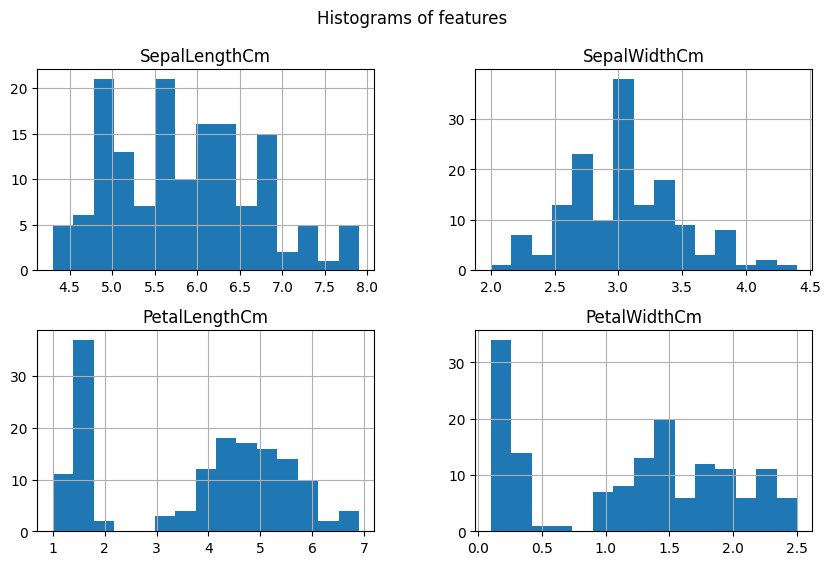

In [1109]:
iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].hist(bins=15, figsize=(10, 6))
plt.suptitle("Histograms of features")
plt.show()

### Sepal length vs width
Compare two length and width of Sepal and color by species

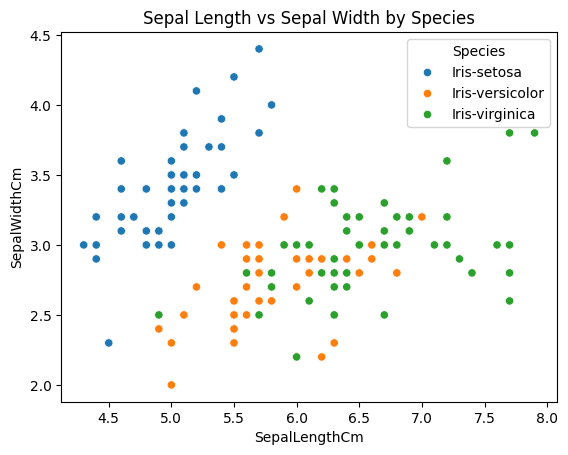

In [1110]:
sns.scatterplot(data=iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
plt.title("Sepal Length vs Sepal Width by Species")
plt.show()

### Petal length vs width
Compare two length and width of Petal and color by species

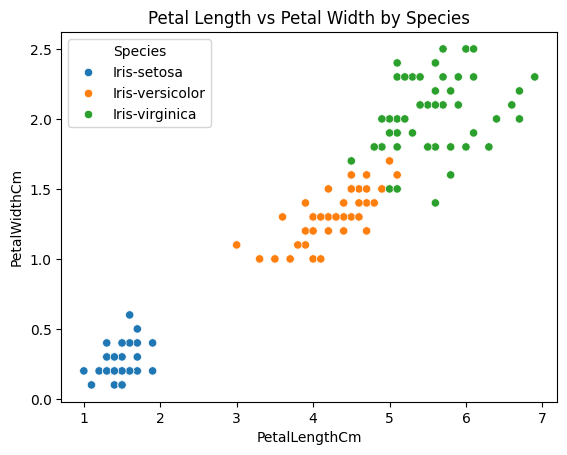

In [1111]:
sns.scatterplot(data=iris, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
plt.title("Petal Length vs Petal Width by Species")
plt.show()

# Data Preprocessing

### See missing values

In [1112]:
print(iris.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


### Drop rows with missing values

In [1113]:
iris = iris.dropna()

### Convert Species into numbers because model needs numeric input

Iris-setosa: 0

Iris-versicolor: 1

Iris-virginica: 2

In [1114]:
target_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris['Species_num'] = iris['Species'].map(target_map)
print(iris.head(150)) 

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  Species_num  
0       Iris-setosa            0  
1       Iris-setosa            0  
2       Iris-setosa            0  
3       Iris-setosa

### Split the data into training and testing sets
80% training, 20% testing

In [1115]:

features = iris[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
target = iris['Species_num']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Model Building
I chose K-Nearest Neighbors because it is easy to understand the algorithm and classifies samples based on similarity.

It works well for small datasets like Iris.

I choose `n_neighbors=5` when define KNN model because the model is more stable than when I choose `n_neighbors=3`. It will look at more neighbors before making a decision -> reduce the effect of noise but still keeps good accuracy.

I will have a step for hyperparameter tuning later to see the differences

In [1116]:
knn = KNeighborsClassifier(n_neighbors=5)

# Model Training

Train the model using training dataset and then predict on test set

In [1117]:
knn.fit(features_train, target_train)

target_prediction = knn.predict(features_test)

# Evaluation

Accuracy shows overall performance

Confusion matrix and classification report show how well the model did for each flower class

### Accuracy

In [1118]:
accuracy = accuracy_score(target_test, target_prediction)
print(accuracy)

0.9666666666666667


### Confusion matrix

In [1119]:
conf_matrix = confusion_matrix(target_test, target_prediction)
print(conf_matrix)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


### Classification report

In [1120]:
class_report = classification_report(target_test, target_prediction, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print(class_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



# Hyperparameter Tuning

The reason why I chose tuning the `n_neighbors` hyperparameter in KNN because it decides how many nearby points that the model looks at to make a prediction

I will test in small k and large k, and then compare these metrics

In [1121]:
for k in [1, 3, 5, 7, 20, 25]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train, target_train)
    target_prediction = knn.predict(features_test)
    accuracy = accuracy_score(target_test, target_prediction)
    conf_matrix = confusion_matrix(target_test, target_prediction)
    class_report = classification_report(target_test, target_prediction, target_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
    print(f"k = {k}, Accuracy = {accuracy:.2f}")
    print(f"k = {k}, Confusion Matrix:\n{conf_matrix}")
    print(f"k = {k}, Classification Report:\n{class_report}")

k = 1, Accuracy = 1.00
k = 1, Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
k = 1, Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

k = 3, Accuracy = 0.97
k = 3, Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
k = 3, Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.